# 环境准备

![](./Resources/ai-sk-add-wechat.png)

## 安装.NET 9 SDK

1. 访问 [https://dot.net/download](https://dot.net/download) 下载安装即可。
2. 安装后，执行`dotnet --info` 或`dotnet --version`，确认是否正确安装。

In [23]:
dotnet --version

9.0.200


In [24]:
dotnet --info

.NET SDK:
 Version:           9.0.200
 Commit:            90e8b202f2
 Workload version:  9.0.200-manifests.b4a8049f
 MSBuild version:   17.13.8+cbc39bea8

Runtime Environment:
 OS Name:     Windows
 OS Version:  10.0.26100
 OS Platform: Windows
 RID:         win-x64
 Base Path:   C:\Program Files\dotnet\sdk\9.0.200\

.NET workloads installed:
There are no installed workloads to display.
Configured to use loose manifests when installing new manifests.

Host:
  Version:      9.0.2
  Architecture: x64
  Commit:       80aa709f5d

.NET SDKs installed:
  3.1.404 [C:\Program Files\dotnet\sdk]
  5.0.301 [C:\Program Files\dotnet\sdk]
  6.0.300 [C:\Program Files\dotnet\sdk]
  6.0.401 [C:\Program Files\dotnet\sdk]
  7.0.304 [C:\Program Files\dotnet\sdk]
  8.0.100 [C:\Program Files\dotnet\sdk]
  9.0.200 [C:\Program Files\dotnet\sdk]

.NET runtimes installed:
  Microsoft.AspNetCore.App 3.1.10 [C:\Program Files\dotnet\shared\Microsoft.AspNetCore.App]
  Microsoft.AspNetCore.App 5.0.7 [C:\Program File

## 安装 VS Code

访问 [https://code.visualstudio.com/download](https://code.visualstudio.com/download) 下载安装即可。

## 安装 VS Code插件
1. 安装 C# 相关插件

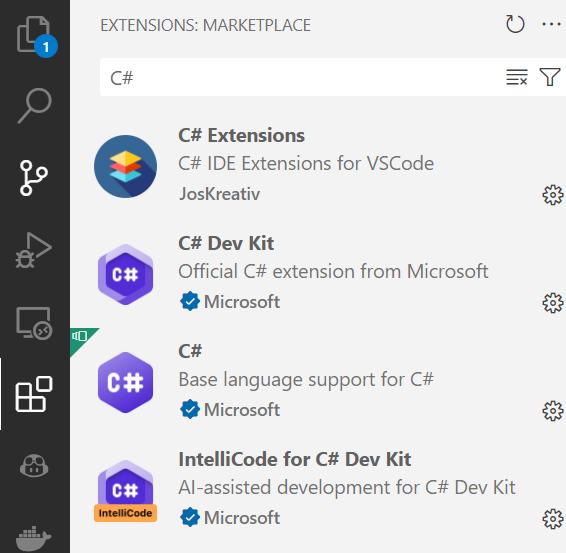

2. 安装 Polyglot Notebooks 插件

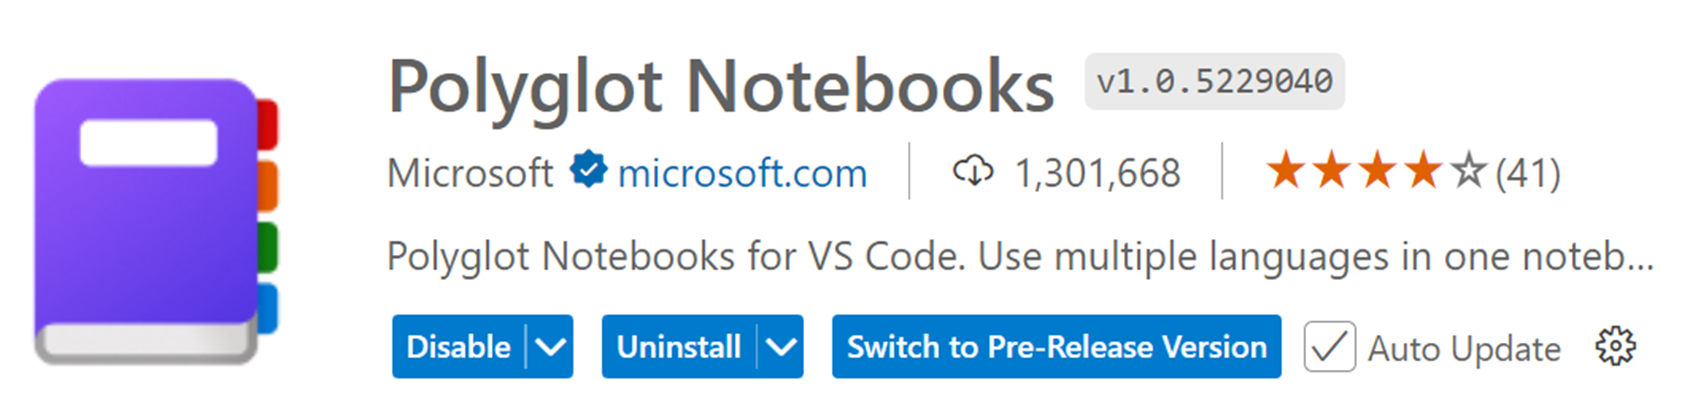

## Polyglot Notebooks 使用教学

>Polyglot Notebook是一个由微软开发的交互式编程环境，它允许用户在同一个笔记本中混合使用多种编程语言，如C#、F#、PowerShell、JavaScript和SQL等。这个工具通过.NET Interactive引擎实现，旨在提高开发者在处理复杂数据分析和机器学习任务时的效率和灵活性。
> 
> Polyglot  Notebook = 交互式编程笔记本 = Markdown + Coding


### 创建笔记：
1. 使用 Ctrl/Cmd+Shift+P 快捷键，并选中 Polyglot Notebook: Create new blank notebook ，再依次选择文件后缀格式（.dib 或.ipynb)，再选择编程语言(C#/F#/等）创建 Ployglot Notebook。
2. 直接新建文件，文件后缀设置为 .dib 或 ipynb 即可。再点击`Selector Kernel` 选择`.NET Interactive`。

>**.ipynb VS .dib**
>
>* .ipynb文件是Jupyter Notebooks引入的交互式Python笔记本文件格式，会存储执行结果，文件大小较大。
>
>* .dib文件是Polyglot Notebooks引入的新文件格式，文件相应较小，用于存储代码和文档，但不存储执行结果，易于版本管理。


### 安装Nuget 包

1. 引用 Nuget 包：使用 `#r "nuget:<package name>[,<package version>]"`命令。举例：

    ● `#r "nuget: Microsoft.SemanticKernel"`引入最新已正式发布的包

    ● `#r "nuget: Microsoft.SemanticKernel, *-*"`引入最新预发布版本的包

    ● `#r "nuget: Microsoft.SemanticKernel, 1.11.1"`引入指定版本的包

2. 指定 Nuget 源：使用 `#i "nuget: {NugetSource}"` 命令。举例：
    * `#i "nuget:https://nuget.cdn.azure.cn/v3/index.json`

In [25]:
// 安装最新Semantic Kernel正式包
#r "nuget: Microsoft.SemanticKernel"

Installed Packages Microsoft.SemanticKernel, 1.40.1

In [26]:
// 安装指定版本的OpenAI Connectors 正式包
#r "nuget: Microsoft.SemanticKernel.Connectors.OpenAI, 1.40.1"

Installed Packages microsoft.semantickernel.connectors.openai, 1.40.1

In [27]:
// 安装最新的Plugins预览包
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, *-*"

Installed Packages Microsoft.SemanticKernel.Plugins.Core, 1.40.1-alpha

### 定义类

In [28]:
// 定义一个类
public class Person 
{
    public string FirstName { get; set; }
    public string LastName { get; set; }
    public int Age { get; set; } 

    override public string ToString()
    {
        return $"{FirstName} {LastName} is {Age} years old.";
    }
}

var person = new Person
{
    FirstName = "John",
    LastName = "Doe",
    Age = 25
};

Console.WriteLine(person);
person.Display();

John Doe is 25 years old.


FirstName,John
LastName,Doe
Age,25


### 引入外部类文件
创建`Config` 文件夹，并创建EnumHelper类。
> 注意：在.NET Interactive 环境中不能定义命名空间！！！

```
using System.ComponentModel;
public class EnumHelper
{
    public static string GetDescription(Enum value)
    {
        var field = value.GetType().GetField(value.ToString());
        var attributes = (DescriptionAttribute[])field.GetCustomAttributes(typeof(DescriptionAttribute), false);
        return attributes.Length > 0 ? attributes[0].Description : value.ToString();
    }
}
```

In [29]:
// 导入外部文件
#!import Config/EnumHelper.cs
enum DayOfWeek
{
    [Description("星期一")]
    Monday = 1,
    [Description("星期二")]
    Tuesday = 2,
    [Description("星期三")]
    Wednesday = 3,
    [Description("星期四")]
    Thursday = 4,
    [Description("星期五")]
    Friday = 5,
    [Description("星期六")]
    Saturday = 6,
    [Description("星期日")]
    Sunday = 7
}
var desc = EnumHelper.GetDescription(DayOfWeek.Monday);
desc.Display();

星期一

### 禁用Warning

In [32]:
using Microsoft.SemanticKernel.Plugins.Core;

#pragma warning disable SKEXP0050
typeof(MathPlugin).Display();
#pragma warning restore SKEXP0050

Microsoft.SemanticKernel.Plugins.Core.MathPlugin

### 交互式输入

In [33]:
//交互式输入
using PolyglotKernel = Microsoft.DotNet.Interactive.Kernel;

var input = await PolyglotKernel.GetInputAsync("Pick a number.");
input.Display();

var input2 = await PolyglotKernel.GetPasswordAsync("Pick a pwd.");

input2.Display();

123

************